# Credit Card Fraud Detection

Credit Card Data -> Data Preporcessing -> Data Analysis -> Train Test Split -> Logistic Regression Model -> Evolution

This is binary classification Model

In [2]:
# IMPORT DEPENDENCIES(LIBRARIES)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

The dataset contains transactions made by credit cards in September 2013 by European cardholders.


This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Due to confidentiality issues, the original features and more background information about the data are hiden. Feautures V1, V2,..., V28 are the pricipal components obtained with PCA.

Principal component analysis (PCA) is a **statistical technique** that uses an orthogonal transformation to reduce the number of dimensions in a dataset.

Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

Feature 'Amount' is the transaction Amount.

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [3]:
# LOADING THE DATASET TO A PANDAS DATAFRAME
data = pd.read_csv('creditcard.csv')

# FIRST 5 ROWS OF THE DATASET
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# LAST 5 ROWS OF THE DATASET
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# DATASET INFORMATION
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# CHECKING THE NUMBER OF MISSING VALUES IN EACH COLUMN
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# DISTRIBUTION OF LEGIT TRANSACTIONS AND FRAUDULENT TRANSACTIONS
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

0 -> Legit Transaction(Normal Transaction)

1 -> Fraudulent Transaction

This dataset is highly unbalanced.

Because the difference between legitimate and fraudulent transactions is huge.

# PRE-PROCESSING THE DATASET

In [7]:
# SEPARATING THE DATA FOR ANALYSIS
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [11]:
print("Legit Transaction: ",legit.shape)
print("Fraudulent Transaction",fraud.shape)

Legit Transaction:  (284315, 31)
Fraudulent Transaction (492, 31)


In [10]:
# STATISTICAL MEASURES OF THE DATA
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

1. **count:** Measure how many rows are in the data: 284315 legit transaction
2. **mean:** Measure the average amount of the legit transaction: 88 dollar
3. **std:** Standard deviation is a measure of how spread out a set of data is relative to its mean: 250

**Note:** A low std indicates that data is clustered closely around the mean, while a high std indicates that data is spread out.

Here, 250 is significantly larger than 88, and data points vary widely from the mean, indicating a broad spread.

     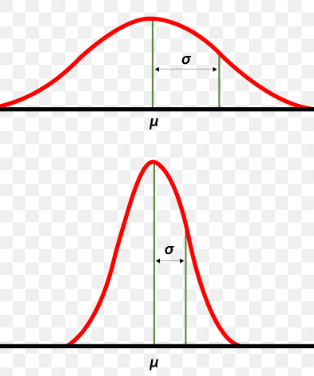
5. **min:** Display the lowest amount: 0 dollar
6. **25%** Display percentile value(25% of the transaction amount are less than or equal to 5.65 dollar)
7. **50%** Display percentile value(50% of the transaction amount are less than or equal to 22 dollar)
8. **75%** Display percentile value(75% of the transaction amount are less than or equal to 77.05 dollar)
9. **max:** Display highest amount: 25691.16 dollar

In [13]:
# STATISTICAL MEASURES OF THE DATA
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

1. **count:** Measure how many rows are in the data: 492 fraud transaction
2. **mean:** Measure the average amount of the fraud transaction: 122 dollar
3. **std:** Standard deviation is a measure of how spread out a set of data is relative to its mean: 256

**Note:** A low std indicates that data is clustered closely around the mean, while a high std indicates that data is spread out.
 
Here, 256 is more than twice the value of the mean(122), and the data points are dispersed over a wide range, indicating high variability.

     ![image.png](attachment:5502946e-a5fb-4b69-a0ca-357a36584039.png)
5. **min:** Display the lowest amount: 0 dollar
6. **25%** Display percentile value(25% of the transaction amount are less than or equal to 1 dollar)
7. **50%** Display percentile value(50% of the transaction amount are less than or equal to 9.25 dollar)
8. **75%** Display percentile value(75% of the transaction amount are less than or equal to 105.89 dollar)
9. **max:** Display highest amount: 2125.87 dollar

In [12]:
legit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [14]:
# COMPARE THE VALUES FOR BOTH TRANSACTIONS
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Under- Sampling

Build a sample dataset containing similar distribution of normal transactions and Fruadulent Transactions

Number of Fraudulent Transactions  --> 492

Now, we take randomly 492 Legit Transaction and join with Fraudulent Transactions. 

It will be very good data set in that case, which has normal and uniform distribution of both(normal and fraud).



In [24]:
legit_sample = legit.sample(n = 492) # take random data points

In [25]:
# CONCATENATING TWO DATAFRAMES
new_dataset = pd.concat([legit_sample, fraud], axis = 0)  #added data one by one row-wise

In [26]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
77447,57055.0,-1.089735,0.085525,2.935398,0.919842,-1.427433,1.291982,-1.437460,-1.102924,-0.030043,...,1.077690,-0.726868,-0.009963,0.379869,0.255752,-0.112015,0.285697,-0.010294,35.00,0
60347,49285.0,1.054644,0.389683,0.724595,2.274938,0.110041,0.698447,-0.211119,0.387819,-0.834518,...,-0.154354,-0.542881,0.206787,-0.376610,0.032584,-0.220024,0.015453,0.009206,2.73,0
10019,15082.0,-0.843768,1.873841,1.424961,3.055870,0.209135,-0.000965,0.780169,0.207666,-1.072061,...,0.028895,0.195415,-0.129711,0.389723,0.365622,0.321009,-0.098073,0.011914,53.89,0
76041,56370.0,-1.417054,-0.492869,1.019945,-0.973100,-0.219125,0.893130,0.138166,0.712897,0.461615,...,-0.030646,-0.480343,0.242135,-1.268671,0.156793,0.889637,-0.208566,-0.139982,199.88,0
201078,133722.0,-1.787806,2.237665,-1.177386,-0.947519,-0.203681,-0.670661,0.019467,1.049930,-0.005909,...,-0.264410,-0.530272,0.179226,-0.467744,-0.198649,0.145241,0.134849,-0.085535,2.67,0


In [27]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [28]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [29]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96801.953252,0.099686,-0.013173,0.002111,-0.065540,0.034786,0.075764,-0.058878,-0.058979,0.001912,...,0.053292,-0.021653,0.040234,0.000081,0.028808,-0.009847,0.026307,0.002409,0.000717,89.062703
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


The mean of the original data set and the new dataset are almost similar.

So, the nature of the dataset does not change.

# Splitting the data into Features & Targets

In [34]:
x = new_dataset.drop(columns= 'Class', axis= 1)  # Dependent variable
y = new_dataset['Class']          # Independent Variable

In [35]:
# ALL COLUMNS EXCEPT 'Class' 
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
77447,57055.0,-1.089735,0.085525,2.935398,0.919842,-1.427433,1.291982,-1.437460,-1.102924,-0.030043,...,-0.892852,1.077690,-0.726868,-0.009963,0.379869,0.255752,-0.112015,0.285697,-0.010294,35.00
60347,49285.0,1.054644,0.389683,0.724595,2.274938,0.110041,0.698447,-0.211119,0.387819,-0.834518,...,-0.278350,-0.154354,-0.542881,0.206787,-0.376610,0.032584,-0.220024,0.015453,0.009206,2.73
10019,15082.0,-0.843768,1.873841,1.424961,3.055870,0.209135,-0.000965,0.780169,0.207666,-1.072061,...,0.117627,0.028895,0.195415,-0.129711,0.389723,0.365622,0.321009,-0.098073,0.011914,53.89
76041,56370.0,-1.417054,-0.492869,1.019945,-0.973100,-0.219125,0.893130,0.138166,0.712897,0.461615,...,0.394713,-0.030646,-0.480343,0.242135,-1.268671,0.156793,0.889637,-0.208566,-0.139982,199.88
201078,133722.0,-1.787806,2.237665,-1.177386,-0.947519,-0.203681,-0.670661,0.019467,1.049930,-0.005909,...,0.286900,-0.264410,-0.530272,0.179226,-0.467744,-0.198649,0.145241,0.134849,-0.085535,2.67


In [36]:
# ONLY 'Class' COLUMN
y.head()

77447     0
60347     0
10019     0
76041     0
201078    0
Name: Class, dtype: int64

### Split the data into Training data & Testing data

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, stratify = y, random_state= 2)

In the scikit-learn train_test_split function, the **stratify** argument is used to ensure that the training and testing data have the **same proportion** of examples for each class. Stratify is an array-like object that determines how to use a stratified split. It's useful when dealing with imbalanced datasets, such as when a class is under-represented.

In machine learning, the stratify parameter within the train_test_split function is a guardian of data consistency. It ensures that the distribution of the classes within the training and testing sets reflects the original dataset's composition.

In [39]:
print(x.shape,x_train.shape ,x_test.shape)

(984, 30) (787, 30) (197, 30)


### Model Training

#### Logistic Regression

In [54]:
model = LogisticRegression()

In [55]:
# TRAING THE LOGISTIC REGRESSION MODEL WITH TRAINING DATA
model.fit(x_train, y_train)

C:\Users\sudes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

#### Accuracy Score

In [43]:
# Accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [44]:
print('Accuracy on Traing data: ', training_data_accuracy)

Accuracy on Traing data:  0.9440914866581956


In [45]:
# ACCURACY ON TEST DATA

In [46]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [47]:
print('Accuracy score on Test Data: ', test_data_accuracy)

Accuracy score on Test Data:  0.934010152284264
